In [8]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [9]:
!chmod 600 /root/.kaggle/kaggle.json

In [10]:
!kaggle datasets download -d salader/dogs-vs-cats


100% 1.06G/1.06G [00:27<00:00, 39.8MB/s]
100% 1.06G/1.06G [00:27<00:00, 41.7MB/s]


In [11]:
import zipfile
zip_ref=zipfile.ZipFile(r"/content/dogs-vs-cats.zip")
zip_ref.extractall('/content')
zip_ref.close()


In [12]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout

In [13]:
# generators
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)
# generators
validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    labels='inferred',
     label_mode = 'int',
     batch_size=32,
     image_size=(256,256)
)


Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [14]:
#normlization
def process(image,label):
  image= tf.cast(image/255, tf.float32)
  return image,label
train_ds = train_ds.map(process)
validation_ds=validation_ds.map(process)


In [19]:
#create CNN Model
model= Sequential()
model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())
model.add(Dense(128,activation="relu"))
model.add(Dense(64,activation="relu"))
model.add(Dense(1,activation="sigmoid"))



In [20]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (BatchN  (None, 254, 254, 32)     128       
 ormalization)                                                   
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 127, 127, 32)     0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Batc  (None, 125, 125, 64)     256       
 hNormalization)                                                 
                                                      

In [25]:
model.compile(optimizer="adam",loss= "binary_crossentropy",metrics=["accuracy"])
# asssign a variable to this code name as history

In [26]:
history=model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
625/625 [==============================] - 73s 110ms/step - loss: 0.0849 - accuracy: 0.9713 - val_loss: 1.1811 - val_accuracy: 0.7930
Epoch 2/10
625/625 [==============================] - 67s 107ms/step - loss: 0.0509 - accuracy: 0.9839 - val_loss: 1.0137 - val_accuracy: 0.8246
Epoch 3/10
625/625 [==============================] - 69s 110ms/step - loss: 0.0309 - accuracy: 0.9890 - val_loss: 1.0618 - val_accuracy: 0.8098
Epoch 4/10
625/625 [==============================] - 68s 108ms/step - loss: 0.0351 - accuracy: 0.9883 - val_loss: 1.0057 - val_accuracy: 0.8114
Epoch 5/10
625/625 [==============================] - 67s 106ms/step - loss: 0.0304 - accuracy: 0.9905 - val_loss: 1.0928 - val_accuracy: 0.8012
Epoch 6/10
625/625 [==============================] - 66s 105ms/step - loss: 0.0285 - accuracy: 0.9910 - val_loss: 1.6718 - val_accuracy: 0.7174
Epoch 7/10
625/625 [==============================] - 68s 107ms/step - loss: 0.0323 - accuracy: 0.9886 - val_loss: 0.9720 - val_ac

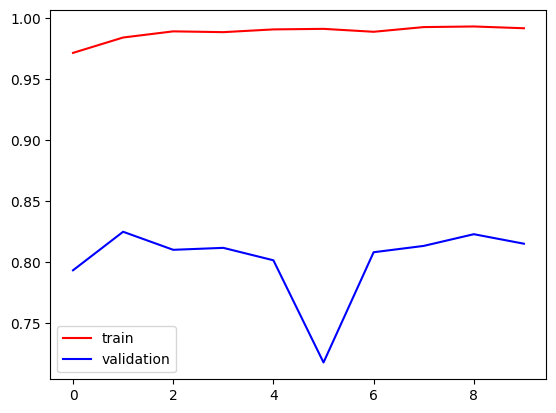

In [27]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

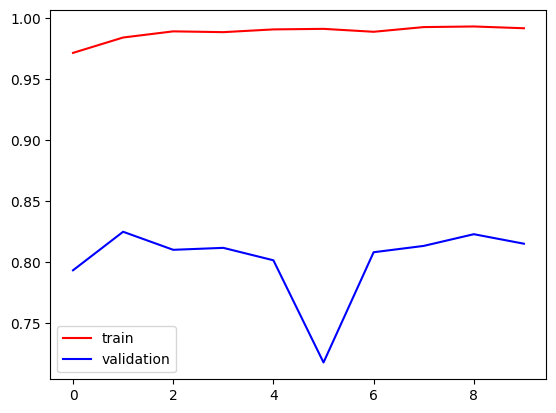

In [28]:
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

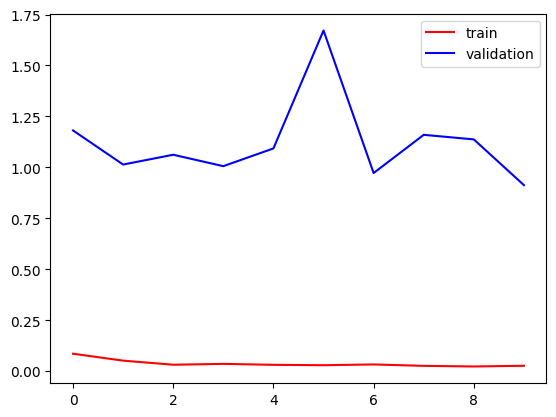

In [29]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

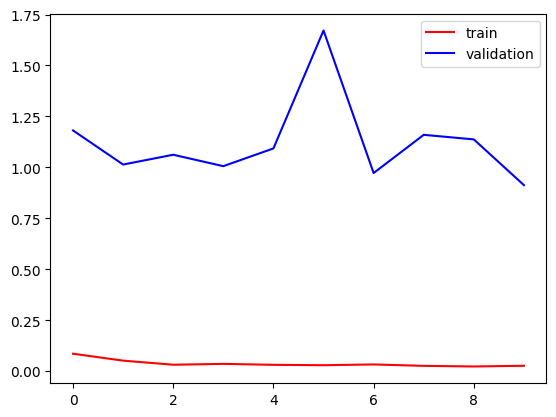

In [30]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [31]:
import cv2

In [33]:
test_dimg=cv2.imread("/content/dog.jpg")

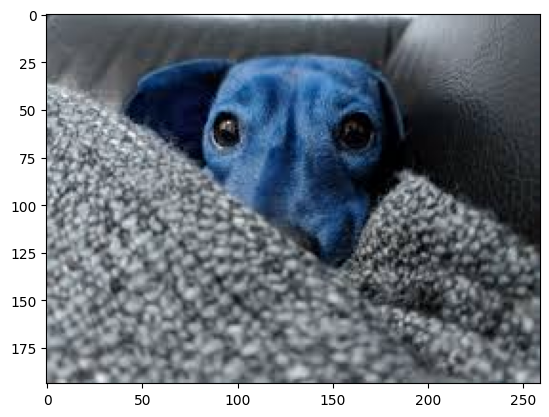

In [34]:
plt.imshow(test_dimg)

In [36]:
test_dimg.shape

(194, 259, 3)

In [44]:

test_img = cv2.resize(test_img,(256,256))
test_input = test_img.reshape((1,256,256,3))

In [46]:
model.predict(test_input)

1/1 [==============================] - 0s 270ms/step


array([[0.]], dtype=float32)

In [48]:
test_cat= cv2.imread("/content/cat.jpg")

In [49]:
test_cat.shape

(675, 1200, 3)

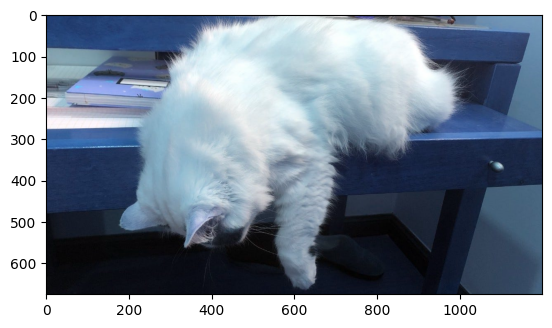

In [50]:
plt.imshow(test_cat)

In [53]:
test_cat=cv2.resize(test_cat,(256,256))

In [54]:
cat_input=test_cat.reshape(1,256,256,3)

In [55]:
model.predict(cat_input)

1/1 [==============================] - 0s 25ms/step


array([[0.]], dtype=float32)